A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")

df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [4]:
corr_matrix = df.corr()
corr_matrix

,Goals,Shots on target,Shots off target,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,...,Goals conceded,Saves made,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Goals,1.000000,0.804193,0.403821,0.650109,0.200512,0.730437,0.023094,0.349330,0.838497,0.830062,...,-0.337689,0.143912,0.663876,0.483833,0.703043,0.337709,-3.580574e-01,0.727830,0.727830,0.136067
Shots on target,0.804193,1.000000,0.611185,0.886090,0.212932,0.478610,-0.229945,0.210571,0.930337,0.923242,...,-0.214415,0.085059,0.765949,0.658353,0.696263,0.544307,-3.340500e-01,0.821342,0.821342,0.249516
Shots off target,0.403821,0.611185,1.000000,0.887032,0.581655,0.126783,-0.173221,0.002284,0.624451,0.612998,...,-0.139274,0.086157,0.615058,0.434815,0.344626,0.534186,-3.377661e-01,0.544974,0.544974,0.045973
Total shots (inc. Blocked),0.650109,0.886090,0.887032,1.000000,0.400121,0.299397,-0.234668,0.125738,0.875698,0.864279,...,-0.184740,0.148269,0.766215,0.623288,0.589635,0.622268,-3.604662e-01,0.763336,0.763336,0.157812
Hit Woodwork,0.200512,0.212932,0.581655,0.400121,1.000000,-0.076923,-0.041345,0.020174,0.095882,0.073814,...,0.062541,-0.230524,0.141180,0.303987,0.113657,0.319708,-2.820513e-01,0.204511,0.204511,-0.189466
Penalty goals,0.730437,0.478610,0.126783,0.299397,-0.076923,1.000000,0.537484,-0.020174,0.545294,0.550720,...,-0.020847,0.058761,0.528185,0.114404,0.627220,0.085467,1.794872e-01,0.531727,0.531727,0.351866
Penalties not scored,0.023094,-0.229945,-0.173221,-0.234668,-0.041345,0.537484,1.000000,-0.357830,-0.169613,-0.179278,...,0.302532,0.051019,0.163643,-0.107169,0.210417,0.127603,5.374838e-01,0.084796,0.084796,0.480079
Headed goals,0.349330,0.210571,0.002284,0.125738,0.020174,-0.020174,-0.357830,1.000000,0.213073,0.200605,...,-0.344447,0.458773,0.157215,0.117445,0.188786,0.067245,-3.429623e-01,0.216077,0.216077,-0.447214
Passes,0.838497,0.930337,0.624451,0.875698,0.095882,0.545294,-0.169613,0.213073,1.000000,0.997697,...,-0.284982,0.207240,0.773382,0.549248,0.731938,0.465799,-4.002506e-01,0.800546,0.800546,0.232214
Passes completed,0.830062,0.923242,0.612998,0.864279,0.073814,0.550720,-0.179278,0.200605,0.997697,1.000000,...,-0.300837,0.184878,0.738845,0.499351,0.704802,0.420410,-4.062897e-01,0.766326,0.766326,0.213345


<AxesSubplot:>

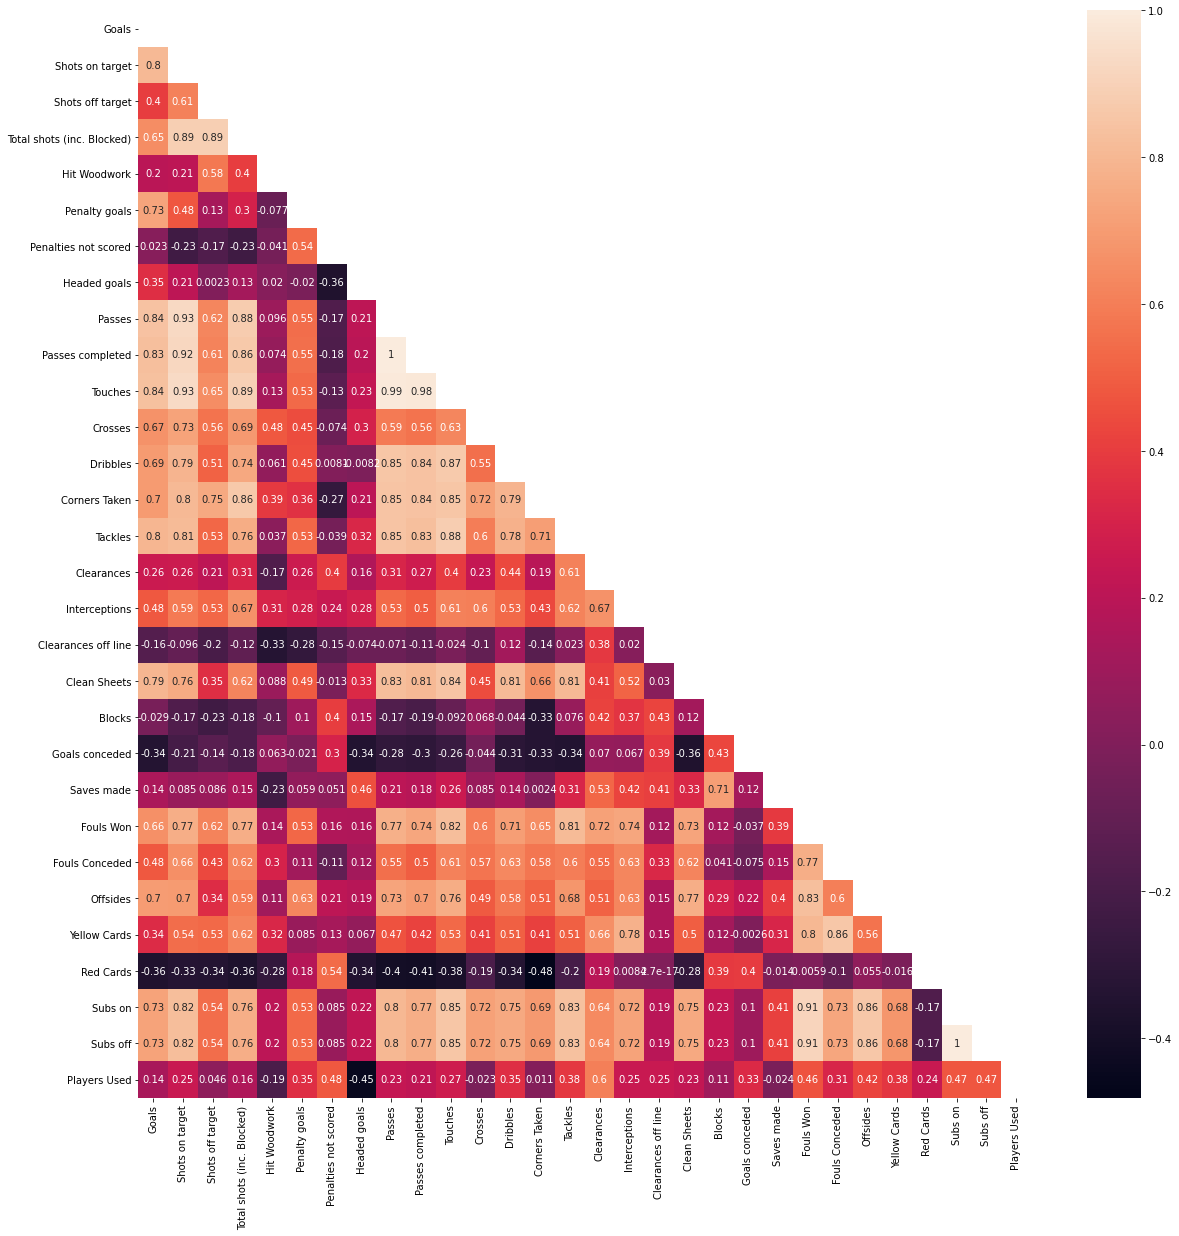

In [6]:
fig, ax = plt.subplots(figsize=(20,20))
matrix = np.triu(df.corr())
sns.heatmap(corr_matrix, annot = True, mask=matrix)

Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles?

Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

% de goles por disparo: 40%
Total shots (inc. Blocked): 102
Corners Taken: 5
Passes: 82
Dribbles: 23

1.

In [14]:
triangulo_superior = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
pares_correlacion = triangulo_superior.unstack().dropna().sort_values()
print(pares_correlacion)

Red Cards         Corners Taken      -0.481090
Players Used      Headed goals       -0.447214
Red Cards         Passes completed   -0.406290
                  Passes             -0.400251
                  Touches            -0.377954
                                        ...   
Touches           Shots on target     0.934623
                  Passes completed    0.984324
                  Passes              0.993044
Passes completed  Passes              0.997697
Subs off          Subs on             1.000000
Length: 435, dtype: float64
C:\Users\marin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#de

Las columnas más correlacionadas son passes completados con pases(obviamente).
Y toques con Tiros a puerta, pases completados  y pases.

2.

Relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles?

In [30]:
X = np.array(df['Shooting Accuracy'].apply(lambda x: x.replace("%","")).astype("float")).reshape(-1, 1)
y = np.array(df['Goals'])

In [31]:
X.shape

(16, 1)

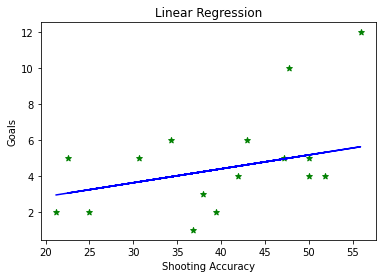

In [43]:
########## Linear Regression ##############
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3) 

model = LinearRegression()

model.fit(X_train, y_train)

plt.scatter(X, y, color='green', marker = "*")
plt.plot(X, model.predict(X), color='blue')
plt.xlabel('Shooting Accuracy')
plt.ylabel('Goals')
plt.title('Linear Regression')
plt.show()

Score: 0.48048275426229703
Score test: -23.915027275170843


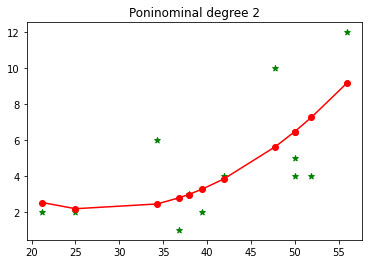

In [67]:
############# Non linear regression polynomial ##############
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error
degree = 2

polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.20, random_state=6) 

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
y_pred = lin_reg_model.predict(X_train)
y_pred_test = lin_reg_model.predict(X_test)


print("Score:", r2_score(y_train, y_pred))
print("Score test:", r2_score(y_test, y_pred_test))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)
X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='green', marker = "*")
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, color='red')
plt.scatter(X_train_to_show, y_pred, color='red')
plt.title("Poninominal degree " + str(degree))
plt.show()

In [70]:
X = np.array(df['Shooting Accuracy'].apply(lambda x: x.replace("%","")).astype("float")).reshape(-1, 1)
y = np.array(df['Goals'])

model.score: 0.9843419638161679


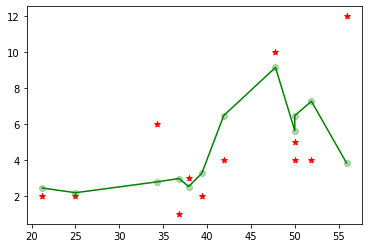

In [88]:
############ SVR ####################
from sklearn.svm import SVR
svr= SVR(kernel='rbf', C=50, gamma=0.1, epsilon=.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6) 
model = svr.fit(X_train, y_train)
print("model.score:", model.score(X_train, y_train))
y_prediction = model.predict(X)

X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='red', marker = "*")
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, color='green')
plt.scatter(X_train_to_show, y_pred, color='green', alpha = 0.3)
plt.show()


3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

        % de goles por disparo: 40%

        Total shots (inc. Blocked): 102

        Corners Taken: 5

        Passes: 82

        Dribbles: 23

In [89]:
df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [ ]:
% de goles por disparo: 40%

Total shots (inc. Blocked): 102

Corners Taken: 5

Passes: 82

Dribbles: 23

In [90]:
#Para acordarme
X = np.array(df['Shooting Accuracy'].apply(lambda x: x.replace("%","")).astype("float")).reshape(-1, 1)
y = np.array(df['Goals'])

In [116]:
goals_to_shots = df["% Goals-to-shots"].apply(lambda x: x.replace("%","")).astype("float")

In [118]:
new = df.filter(["Total shots (inc. Blocked)","Corners Taken","Passes","Dribbles"], axis=1)
new['% Goals to shots'] = goals_to_shots
new

,Total shots (inc. Blocked),Corners Taken,Passes,Dribbles,% Goals to shots
0,32,14,1076,42,16.0
1,39,21,1565,68,12.9
2,27,16,1298,32,20.0
3,40,16,1488,60,17.2
4,65,28,2066,76,6.5
5,80,35,2774,60,15.6
6,32,10,1187,53,19.2
7,110,30,3016,75,7.5
8,60,22,1556,49,4.1
9,48,14,1059,39,5.2


In [119]:
X = new
y = np.array(df['Goals'])

In [122]:
X.shape

(16, 5)

In [123]:
y.shape

(16,)

In [138]:
import warnings

warnings.filterwarnings("ignore")

In [157]:
############### Regresión logística ##################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)
model = LogisticRegression()

model.fit(X,y)
model.score(X, y)
model.fit(X_train, y_train)
y_pred = model.predict([[102, 5, 82, 23,40]])


print('Score del modelo:', model.score(X, y))
print('Predicción de goles:', y_pred)

Score del modelo: 0.8125
Predicción de goles: [6]


In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [173]:
############### Random Forest ##################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
soft_voting_clf = VotingClassifier(estimators=estimators, voting='soft')

soft_voting_clf.fit(X_train, y_train)
y_pred_train = clf.predict([[102, 5, 82, 23,40]])
print('Score test:', accuracy_score(y_pred, y_test))
print('Predicción de goles:', y_pred_train)

Score test: 0.25
Predicción de goles: [6]


In [188]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [189]:
############### SVM ##################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)
svc = svm.SVC()
parameters = {
    'kernel': ('linear', 'rbf', 'sigmoid'),
    'C': [0.001, 0.1, 0.5, 1, 5, 10],
    'gamma': ('scale', 'auto')
}

clf = GridSearchCV(estimator = svc,
                  param_grid = parameters,
                  n_jobs=-1,
                  cv=2,
                  verbose=1)

clf.fit(X, y)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 0.5, 1, 5, 10],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf', 'sigmoid')},
             verbose=1)

In [190]:
print("Predicción de goles:", clf.predict([[102, 5, 82, 23,40]]))

Predicción de goles: [1]
